# Masayu Nadila Maharani ( 09011181823023 )

Pengujian Artificial Neural Network Back Propagation pada Data Set Iris

## Pengenalan Artificial Neural Network

Artificial neural network merupakan jaringan yang slaing berhubungan antar node-node dimana tiap-tiap hubungan tersebut mempunyai bobot koneksi yang dilatih untuk mencapai respon yang diinginkan. Masing-masing bobot koneksi dipropogasikan keseluruh simpul atau node. Dengan pelatihan terhadap data berdasarkan bobot-bobot koneksi tersebut diharapkan memperoleh output yang diinginkan.
   
   Proses kerja dari Artificial Neural Network adalah untuk menggambarkan dan mengelompokkan bentuk yang berbeda dari beberapa populasi yang telah diketahui, sehingga populasi tersebut terpisah dengan baik serta dapat menentukan fungsi pembeda antar kelompok dan mengkalsifikasikan objek baru kedalam kelas atau kelompok. Kelebihan dari Artificial neural network adalah bahwa fungsi yang digunakan non linear, mempunyai ketelitian yang tinggi serta tidak mempunyai model, sehingga dengan metode artificial neural network ini tidak diperlukan lagi asumsi dari data multivariant yang berdistribusi normal.

## Implementasi Neural Network Back Propagation

#### Pertama-tama, kita perlu mengimpor library : 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### since our lables in Iris datasets (species) was orderd, we shuffle them

In [49]:
from sklearn.utils import shuffle

In [14]:
%matplotlib inline

In [15]:
df = pd.read_csv('E:/SEMESTER 5/UTS AI/Iris.csv')

#### Kami melakukan beberapa normalisasi pada features didataset

In [16]:
df_norm  = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].apply(lambda x: (x - x.min())/(x.max() - x.min()))

#### pada library pandas, kami memiliki fungsi yang disebut dengan get_dummies yang membuat variabel dummy untuk feature categorical

In [17]:
species= pd.get_dummies(df['Species'])

In [18]:
df_norm = pd.concat([df_norm,species],axis=1)

In [19]:
df_norm.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.222222,0.625000,0.067797,0.041667,1,0,0
1,0.166667,0.416667,0.067797,0.041667,1,0,0
2,0.111111,0.500000,0.050847,0.041667,1,0,0
3,0.083333,0.458333,0.084746,0.041667,1,0,0
4,0.194444,0.666667,0.067797,0.041667,1,0,0


## Dataframe dan Matriks

dataframe merupakan kerangka data yang berisi variabel yang memiliki karakteristik seperti matrik. Data frame ini berbentuk seperti tabel. Matriks adalah untuk data dari tipe yang sama. Matriks adalah suatu keharusan jika berencana untuk melakukan segala jenis operasi aljabar linear. sedangkan Dataframe lebih nyaman jika sering merujuk ke kolomnya denga nama (melalui operator $ compact). Frame data juga IMHO lebih baik untuk mencetak informasi tabular karena dapat menerapkan pemformatan kesetiap kolom secara terpisah. 


#### Lalu kami mengubah Dataframe menjadi Matriks

In [20]:
data=df_norm.values

#####  mengapa mengubah Dataframe menjadi Matriks
karena menggunakan matriks dapat membuat kode jauh lebih efisien dari pada menggunakan Dataframe. itulah salah satu alasan mengapa secara internal, banyak fungsi R akan memaksa data Matriks yang ada dalam Dataframe. 

In [21]:
data=shuffle(data)
print(data)

[[0.47222222 0.29166667 0.69491525 ... 0.         1.         0.        ]
 [0.19444444 0.41666667 0.10169492 ... 1.         0.         0.        ]
 [0.61111111 0.41666667 0.81355932 ... 0.         0.         1.        ]
 ...
 [0.80555556 0.5        0.84745763 ... 0.         0.         1.        ]
 [0.22222222 0.75       0.15254237 ... 1.         0.         0.        ]
 [0.22222222 0.75       0.08474576 ... 1.         0.         0.        ]]


#### sekarang kami memperkenalkan fungsi aktivasi dan turunannya :

Artficial Neural Network menggunakan fungsi aktivasi untuk membatasi keluaran Y agar sesuai dengan batasan sinyal outputnya.

#### g(s_i) adalah aktivasi untuk [i] perceptron dari layer.

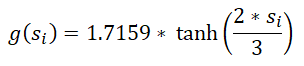

In [22]:
#activation function (sigmoid)
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [23]:
#derivation of activation function(sigmoid)
def der_sigmoid(x):
    return x * (1.0-x)

In [24]:
#activation function
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [25]:
def relu(X):
    return np.maximum(0,X)

In [26]:
def der_relu(X):
    return np.where(X <= 0,0,1)

#### Disini kami menetapkan 100 sample untuk training set :

In [27]:
#input layer
X_train = data[:100,:4]
#X_train=np.array([[5.1,3.5,1.4,0.2],
#            [5.6,2.5,3.9,1.1],
#            [5.9,3.0,5.1,1.8]])
X_train.shape

(100, 4)

In [28]:
#output layer
y_train = data[:100,4:]
#y_train=np.array([[1,0,0],
#            [0,1,0],
#            [0,0,1]])
y_train.shape

(100, 3)

#### Dan juga 50 sampel untuk set validasi kami :

In [29]:
X_test = data[100:,:4]
#X_train=np.array([[5.1,3.5,1.4,0.2],
#            [5.6,2.5,3.9,1.1],
#            [5.9,3.0,5.1,1.8]])
X_test.shape

(50, 4)

In [30]:
y_test = data[100:,4:]
#y_train=np.array([[1,0,0],
#            [0,1,0],
#            [0,0,1]])
y_test.shape

(50, 3)

In [31]:
np.random.seed()

#### Disini kami menginisiasi bobot. bobot yang kami hasilkan berada dalam interval [0,1]

#### Mengapa [0,1] ?
Karena dalam fungsi aktivasi sigmoid, output kami akan berada dalam interval ini, jadi kami menetapkan kecepatan awal pada interval ini untuk beberapa alasan. 

#### Dan kami juga menampilkan jumlah neuron disini.

In [32]:
#weights for first and second layer
w1_1 = np.random.uniform(0,1,(4,9))
#w1_1= 2 * np.random.random((4,3)) -1

In [33]:
wb1=np.random.uniform(0,1,(1,9))

In [34]:
#weights for first and second layer
w2_2 = np.random.uniform(0,1,(9,3))
#w1_1= 2 * np.random.random((4,3)) -1

In [35]:
wb2=np.random.uniform(0,1,(1,3))

#### Adapun parameter momentum yang akan mengatur kecepatan memperbarui bobot 

In [36]:
vel1=np.zeros_like(w1_1)

In [37]:
vel2=np.zeros_like(w2_2)

#### Bias di setiap lapisan dalam teori seharusnya membuat akurasi lebih baik, tetapi di sini kita mencapai akurasi 93% tanpa bias.

In [38]:
b1=np.zeros((100,1))+1

In [39]:
b2=np.zeros((100,1))+1

Tujuan ini dibawah 2 line :
karena kami membuat bobot acak, kami tidak dapat mengatakan bahwa perubahan kami pada perubahan parameter membantu kami, jadi kami memegang nilai setiap saat untuk membuat hasil hanya terkait dengan parameter tuning kami.

In [40]:
w1=np.copy(w1_1)
w2=np.copy(w2_2)

#### Adapun disini yang pertama kita lakukan yaitu menghitung Forward propagation kemudian menghitung fungsi biaya (functions cost) dan terakhir menghitung Back Propagation

### Forward Propagation
Forward propagation yaitu mengacu pada kalkulasi dan penyimpanan variabel perantara (termasuk keluaran) untuk jaringa neural dalam urutan dari lapisan masukan kelapisan keluaran. Forward pass atau biasa disebut Forward propaggation ini adalah proses dimana kita membawa data pada input melewati tiap neuron pada hidden layer sampai kepada output layer yang nanti akan dihitung errornya. 

#### Perhitungan secara umum bisa menggunakan rumus :

## 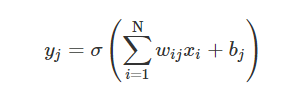

### Back Propagation 
Back Propagation secara efisien menghitung gradien dari fungsi kerugian sehubungan dengan bobot jaringan untuk satu contoh input-output. ini membuatnya layak untuk menggunakan metode gradien untuk melatih jaringan multi-lapisan, memperbarui bobot untuk meminimalkan kerugian dan biasanya seseorang menggunakan penurunan gradien atau varian seperti penurunan gradien stokastik. 

Back Propagation ini juga merupakan metode pembelajaran ANN (jaringan saraf tiruan) yang bekerja melalui proses secara iteratif dengan menggunakan data training membandingkan nilai prediksi dari jaringan dengan setiap contoh data.
dalam setiap proses bobot relasi jaringan dimodifikasi untuk meminimalkan nilai MSE (mean Squared Error) antara nilai prediksi dari jaringan dengan nilai sesungguhnya. 
modifikasi relasi jaringan tersebut dilakukan dalam arah mundur dari layer output kelayer pertama dari hidden layer. 

### Rumus utama untuk memperbaiki suatu bobot w  berdasarkan error E adalah:
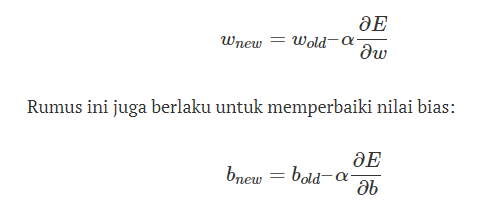


In [41]:
lis = []
lis_test= []
for i in range(10000):

    #forward propagation
    
    
    #second layer output 
    z2=np.dot(X_train,w1)+np.dot(b1,wb1)
    a2=sigmoid(z2)
    
    
    #final layer output 

    z3=np.dot(a2,w2)+np.dot(b2,wb2)
    a3=sigmoid(z3)    
    
    
    #Backpropagation
    
    cost = 0.5 * (y_train - a3)**2
    lis.append(np.sum(cost))
    
    #print('Epochs',i,':',np.sum(cost))
    #derviation of cost function
    
    
    delta3 = (y_train - a3) * (der_sigmoid(a3))
    gamma2 = np.dot(a2.T,delta3)
    
    delta2 = np.dot(delta3,w2.T) * (der_sigmoid(a2))
    gamma1 = np.dot(X_train.T,delta2) #forward propagation test
    
    
    #second layer output 
    z2_t=np.dot(X_test,w1)
    a2_t=sigmoid(z2_t)
    
    
    #final layer output 

    z3_t=np.dot(a2_t,w2)
    a3_t=sigmoid(z3_t)    
    
    
    #Backpropagation
    
    cost = 0.5 * (y_test - a3_t)**2
    lis_test.append(np.sum(cost))
    
    
    
    #updating the weights

    #learning rate
    q=0.15
    momen=0.1
    
    vel1=momen*vel1+q*(gamma1)
    vel2=momen*vel2+q*(gamma2)
    vel1.shape
    #w1 += (q*(1/100)*gamma1)
    w1= w1+(1/100)*vel1
    #w2 += (q*(1/100)*gamma2)
    w2= w2+(1/100)*vel2


print('the prediction:\n',a3[:8])
print('\n the output:\n',y_train[:8])
print('the cost is:\n',np.sum(cost))

the prediction:
 [[1.78062053e-02 5.12292524e-01 5.19203854e-01]
 [9.38181530e-01 2.20077294e-01 1.24446499e-04]
 [8.86780296e-03 3.68231265e-01 7.93588997e-01]
 [2.03571627e-02 5.34778884e-01 4.28991917e-01]
 [1.64717151e-02 5.20623155e-01 5.71122865e-01]
 [9.54543670e-01 2.05493596e-01 1.05353232e-04]
 [2.68876613e-02 5.33209549e-01 3.48067282e-01]
 [2.54813192e-02 5.28380018e-01 3.19625810e-01]]

 the output:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
the cost is:
 4.786539511723049


#### Validasi Forward Propagation

In [42]:
#forward propagation
    
#second layer output with 3 neuron
z2=np.dot(X_test,w1)
a2=sigmoid(z2)
    
    
#final layer output with 3 neuron

z3=np.dot(a2,w2)
a3=sigmoid(z3)    
    

print('the prediction:\n',a3[:5])
print('\n the output:\n',y_test[:5])

the prediction:
 [[2.01322988e-02 3.71228926e-01 3.04326451e-01]
 [5.65449835e-03 2.38774962e-01 7.06599603e-01]
 [6.91230339e-03 2.77592091e-01 6.98586366e-01]
 [9.82894884e-01 4.89307281e-02 1.23523862e-05]
 [7.05666390e-03 2.78431512e-01 6.34547751e-01]]

 the output:
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### Karena output kita memiliki nilai kemungkina, maka kita mengaturnya kevektor kesatuan unitary seperti dibawah ini :

In [43]:
from numpy import linalg as LA

In [44]:
arr = np.zeros((a3.shape[0],a3.shape[1]))
for i in range(a3.shape[0]):
    for j in range(a3.shape[1]):
        if LA.norm(a3[i],np.inf)==a3[i,j]:
            arr[i,j]=1
        else:
            arr[i,j]=0
            
print(arr)
#print(LA.norm(a4[0],np.inf))
#print(a4[0])
#print(a4[0,0])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


#### Untuk menghitung akurasi :

In [45]:
from sklearn.metrics import accuracy_score,classification_report

In [46]:
print(accuracy_score(y_test,arr))
print(classification_report(y_test,arr))

0.92
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      0.69      0.82        13
          2       0.79      1.00      0.88        15

avg / total       0.94      0.92      0.92        50



#### Rata-rata error swuared untuk Train set dan Test set :

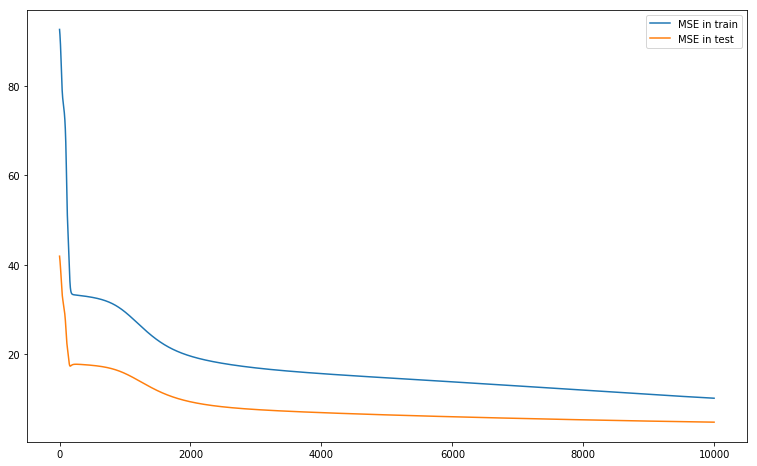

In [47]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.plot(range(0,10000),lis,label='MSE in train')
ax.plot(range(0,10000),lis_test,label='MSE in test')
ax.legend(loc=0)

### Kesimpulan
tujuan dalam penenlitian ini adalah untuk mendapatkan pencarian bobot pada Artificial Neural Network dalam Data set iris dengan menggunakan metode Backpropagation. Hasil analisis data menggunakan Artificial Neural Network dengan metode Backpropagation memberikan hasil yang maksismal. 

Di sini memiliki 150 sampel yang telah diberi label pada empat fitur, yang menggunakan peran pembelajaran multi layer perceptrone dan Back propagation yang membantu memperbarui bobot di setiap zaman untuk menemukan akurasi yang lebih baik. untuk banyak epochs cenderung overfitting, yang dalam statistik mengatakan bias rendah dan varians tinggi sehingga tidak dapat menemukan model yang baik untuk set data pengujian, dan jumlah epoch yang rendah mybe tidak dapat menyesuaikan model pada data saya dan dengan kata lain itu menyebabkan varians rendah dan bias tinggi, jadi saya mencoba jumlah epech yang berbeda untuk menemukan trade-off terbaik pada bias dan varians.

juga memiliki parameter pengoptimalan lainnya seperti kecepatan pembelajaran (dalam kode ditampilkan sebagai q) dan momentum (ditampilkan sebagai momen) dan yang paling penting memiliki berbagai jenis fungsi aktivasi. (di sini menemukan RelU, sigmoid dan tanh).

sumber https://github.com/navidsahleh/Back-Propagation-Neural-Network/tree/master/iris